# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
%pylab inline
import pandas as pd
import glob
import numpy as np
import json
import folium
import os
import xlrd
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
folium.__version__ == '0.6.0'

True

In [3]:
DATA = './data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

## Task 1A

### Display a map of Switzerland with national and cantonal borders

In [4]:
canton_path = DATA + 'ch-cantons.topojson.json'
canton_geo_data = json.load(open(canton_path))

In [5]:
center_location = [46.75, 8.38]
swiss_canton_map = folium.Map(center_location, zoom_start = 8)
swiss_canton_map.choropleth(geo_data=canton_geo_data, topojson='objects.cantons', fill_opacity=0.2, 
                            fill_color='red')
swiss_canton_map

In [6]:
swiss_canton_map.save('swiss_canton_map.html')

## Task B

### Plot a histogram of population counts by commune

In [7]:
communes = pd.read_excel(DATA + 'communes_pop.xls', sheet_name=None, header=[2,3,4,5])

In [8]:
communes['2017'].columns = ['Etat de la population au 1er janvier', 'Naissances vivantes', 'Deces', 
                               'Accroissement naturel', 'Arrivees', 'Departs', 'Solde migratoire', 
                               'Divergences statistiques', 'Etat de la populations au 31 decembre', 
                               'Variation en nombres absolus', 'Variation en %']
communes['2017'].head()

,Etat de la population au 1er janvier,Naissances vivantes,Deces,Accroissement naturel,Arrivees,Departs,Solde migratoire,Divergences statistiques,Etat de la populations au 31 decembre,Variation en nombres absolus,Variation en %
Suisse 2),8419550.0,87381.0,66971.0,20410.0,681011.0,635063.0,45948.0,-1778.0,8484130.0,64580.0,0.767024
- Zürich,1487969.0,17070.0,11076.0,5994.0,120593.0,108666.0,11927.0,-1544.0,1504346.0,16377.0,1.100628
>> Bezirk Affoltern,52904.0,517.0,310.0,207.0,4501.0,3862.0,639.0,21.0,53771.0,867.0,1.638817
......0001 Aeugst am Albis,1977.0,10.0,7.0,3.0,129.0,165.0,-36.0,-3.0,1941.0,-36.0,-1.820941
......0002 Affoltern am Albis,11900.0,128.0,93.0,35.0,1239.0,1029.0,210.0,1.0,12146.0,246.0,2.067227


Text(0.5,1,'Histogram of population counts for each commune')

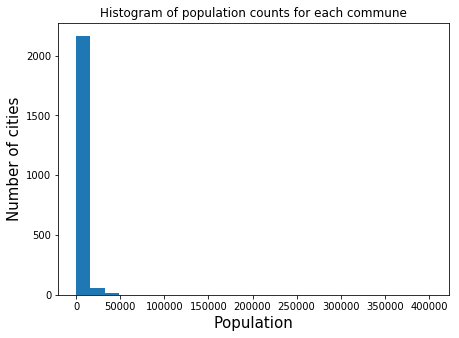

In [9]:
#remove NaN rows at end of dataframe
communes['2017'] = communes['2017'].dropna()

#We only want commune populations, not all Switzerland or cantons
#We see above that commune populations always start in the same way
cities_pop_index = communes['2017'].index.str.startswith('...')

graph1 = communes['2017'].iloc[(cities_pop_index), 0].plot(kind = 'hist', bins = 25, figsize=[7,5]);
graph1.set_xlabel('Population', fontsize = 15);
graph1.set_ylabel('Number of cities', fontsize = 15);
graph1.set_title('Histogram of population counts for each commune')

**In this representation, we can't see much. But it seems clear that a majority of communes have less than 25000 inhabitants. Only a few cities have larger populations.**

## Task 1C

### Represent the data from task 1B

**First graphs: log-log axis with two different bin counts **

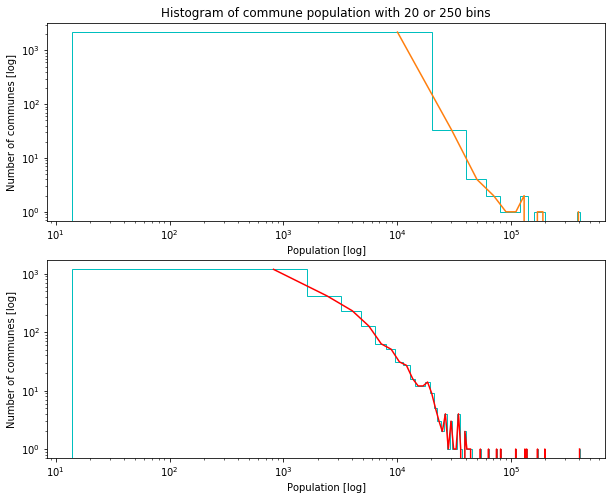

In [19]:
fig, axes = plt.subplots(figsize = (10, 8), nrows= 2 , ncols = 1)

binCount = 20
(binEdges,x,_)=axes[0].hist(communes['2017'].iloc[(cities_pop_index), 0], bins = binCount, histtype = u'step', ec = 'c')
axes[0].plot(x[:-1]+max(communes['2017'].iloc[(cities_pop_index), 0])/(2*binCount), binEdges)
axes[0].set_xscale('log')
axes[0].set_xlabel("Population [log]")
axes[0].set_ylabel("Number of communes [log]")
axes[0].set_yscale('log')
axes[0].set_title('Histogram of commune population with 20 or 250 bins')

binCount2 = 250
(binEdges2, x2, _)=axes[1].hist(communes['2017'].iloc[(cities_pop_index), 0], bins = binCount2, histtype = u'step', ec = 'c')
axes[1].plot(x2[:-1]+max(communes['2017'].iloc[(cities_pop_index), 0])/(2*binCount2), binEdges2,'r-')
axes[1].set_xscale('log')
axes[1].set_xlabel("Population [log]")
axes[1].set_ylabel("Number of communes [log]")
axes[1].set_yscale('log')
#axes[1].set_title('Histogram of commune population with 250 bins')
show()

**Noise increases with the number of bins and as we near the x axis. The relationship between population and communes almost follows a power law. **

**Next graph: log-log axis with y the number of samples with a value greater than x **

Text(0.5,1,'Inverse-cumulative histogram of commune populations on log-log axis')

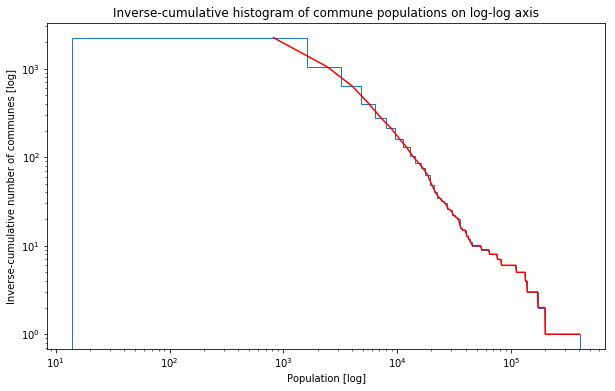

In [26]:
fig, axes2 = plt.subplots(figsize = (10, 6))
binCount3 = 250
(binEdges3, x3, _)=axes2.hist(communes['2017'].iloc[(cities_pop_index), 0], bins = binCount3, cumulative = -1, histtype = u'step')
axes2.set_xscale('log')
axes2.set_xlabel('Population [log]')
axes2.set_yscale('log')
axes2.set_ylabel('Inverse-cumulative number of communes [log]')

axes2.plot(x3[:-1]+max(communes['2017'].iloc[(cities_pop_index), 0])/(2*binCount3), binEdges3,'r-');

axes2.set_title('Inverse-cumulative histogram of commune populations on log-log axis')

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [39]:
voters = pd.read_excel('data/voters.xls', sheet_name='actuel (2014-2018)', header=3)
voters = voters.reset_index()
#Columns or rows of entirely NaN values are dropped
voters = voters.dropna(axis=1, how='all')
voters = voters.dropna(axis=0, how='all')
voters = voters.reset_index(drop=True)
voters.head()

,level_0,Année électorale 2),Participation,PLR 6),PDC 7),PS,UDC,PLS 6),PEV,PCS,...,PSA,PES,AVF 8),Sol.,DS,UDF,Lega,MCR,Autres 11),Total
0,Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,NaN,...,NaN,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100
1,Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,NaN,...,0.681873,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100
2,Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,NaN,...,NaN,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100
3,Uri 1),2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,NaN,...,NaN,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100
4,Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,NaN,...,NaN,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100


## Task 2A

### Visualize the percentage of voters per canton who voted UDC (2014-18)

In [40]:
#UDC voters per canton
udc_voters = pd.DataFrame(data={'cantons':voters.level_0, 'UDC':voters.UDC})
#we add a column with canton abbreviations to be able to link it with the json file that has German names
canton_abbrv = ['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI',
                'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']
canton_abbrv = pd.Series(canton_abbrv)
udc_voters['canton_abr'] = canton_abbrv
udc_voters = udc_voters.fillna(0.0)

In [44]:
udc_voter_map = folium.Map(center_location, tiles='cartodbpositron', zoom_start=8)
udc_voter_map.choropleth(geo_data=canton_geo_data, data=udc_voters,
                     columns=['canton_abr', 'UDC'], key_on='feature.id', 
                     fill_color='YlGn', fill_opacity=0.7, line_weight=0.2, 
                     threshold_scale=[0, 1, 10, 20, 25, 35],
                     legend_name='UDC voters (%)', topojson='objects.cantons')

udc_voter_map
#Defining the threshold allowed us to make converted-NaN values into their own color

In [45]:
udc_voter_map.save('udc_voter_map.html')

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.